In [34]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import pandas as pd

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

In [35]:
Cl_sims = torch.load("data/raw/cmb_angular_sims.pt").numpy()
params = torch.load("data/raw/angular_sim_params.pt").numpy()

print(Cl_sims.shape) # Solo 50 realizaciones por mientras
print(params.shape)

(50, 2401, 4)
(50, 6)


C:\Users\Julian\AppData\Local\Temp\ipykernel_2532\1580268151.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Cl_sims = torch.load("data/raw/cmb_angular_sims.pt").numpy()

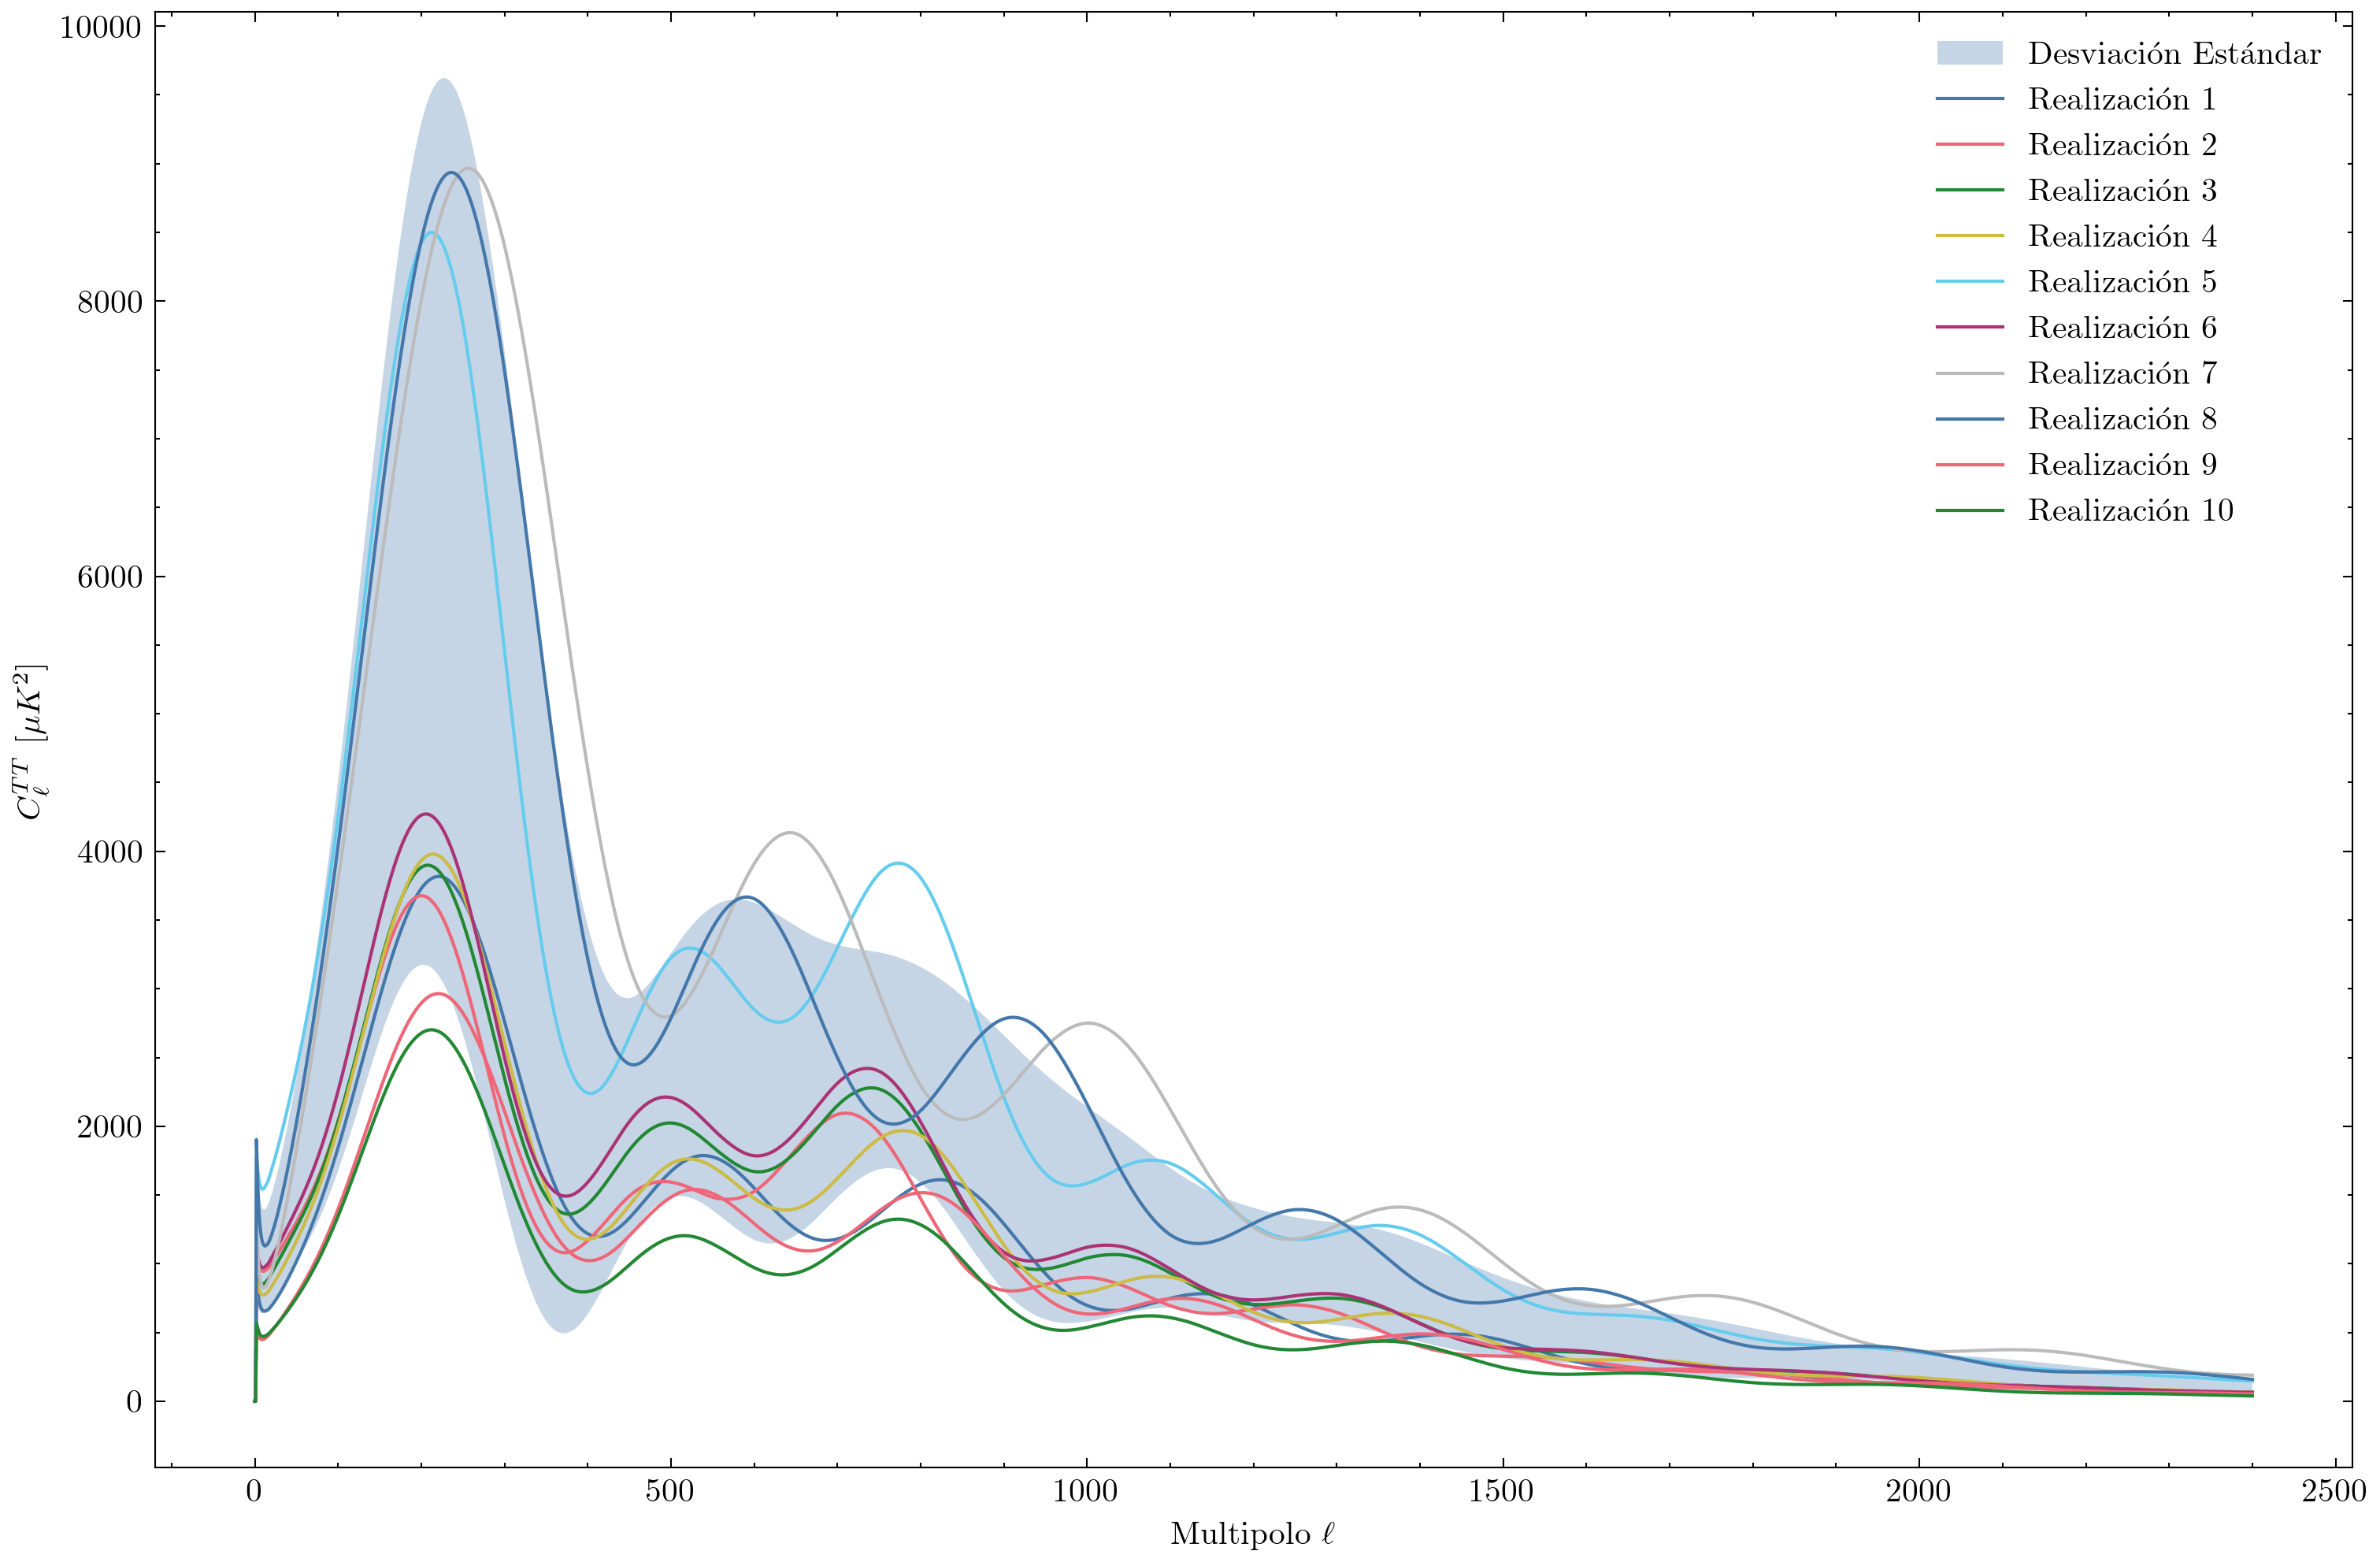

In [36]:
# Graficar lo que se pueda
mean_Cl = np.mean(Cl_sims, axis=0)
std_Cl = np.std(Cl_sims, axis=0)

plt.figure(figsize=(12, 8))
plt.fill_between(range(len(mean_Cl)), mean_Cl[:, 0] - std_Cl[:, 0], mean_Cl[:, 0] + std_Cl[:, 0], alpha=0.3, label='Desviación Estándar')
for i in range(10):  
    plt.plot(Cl_sims[i, :, 0], label=f'Realización {i+1}')
plt.xlabel('Multipolo $\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.show()

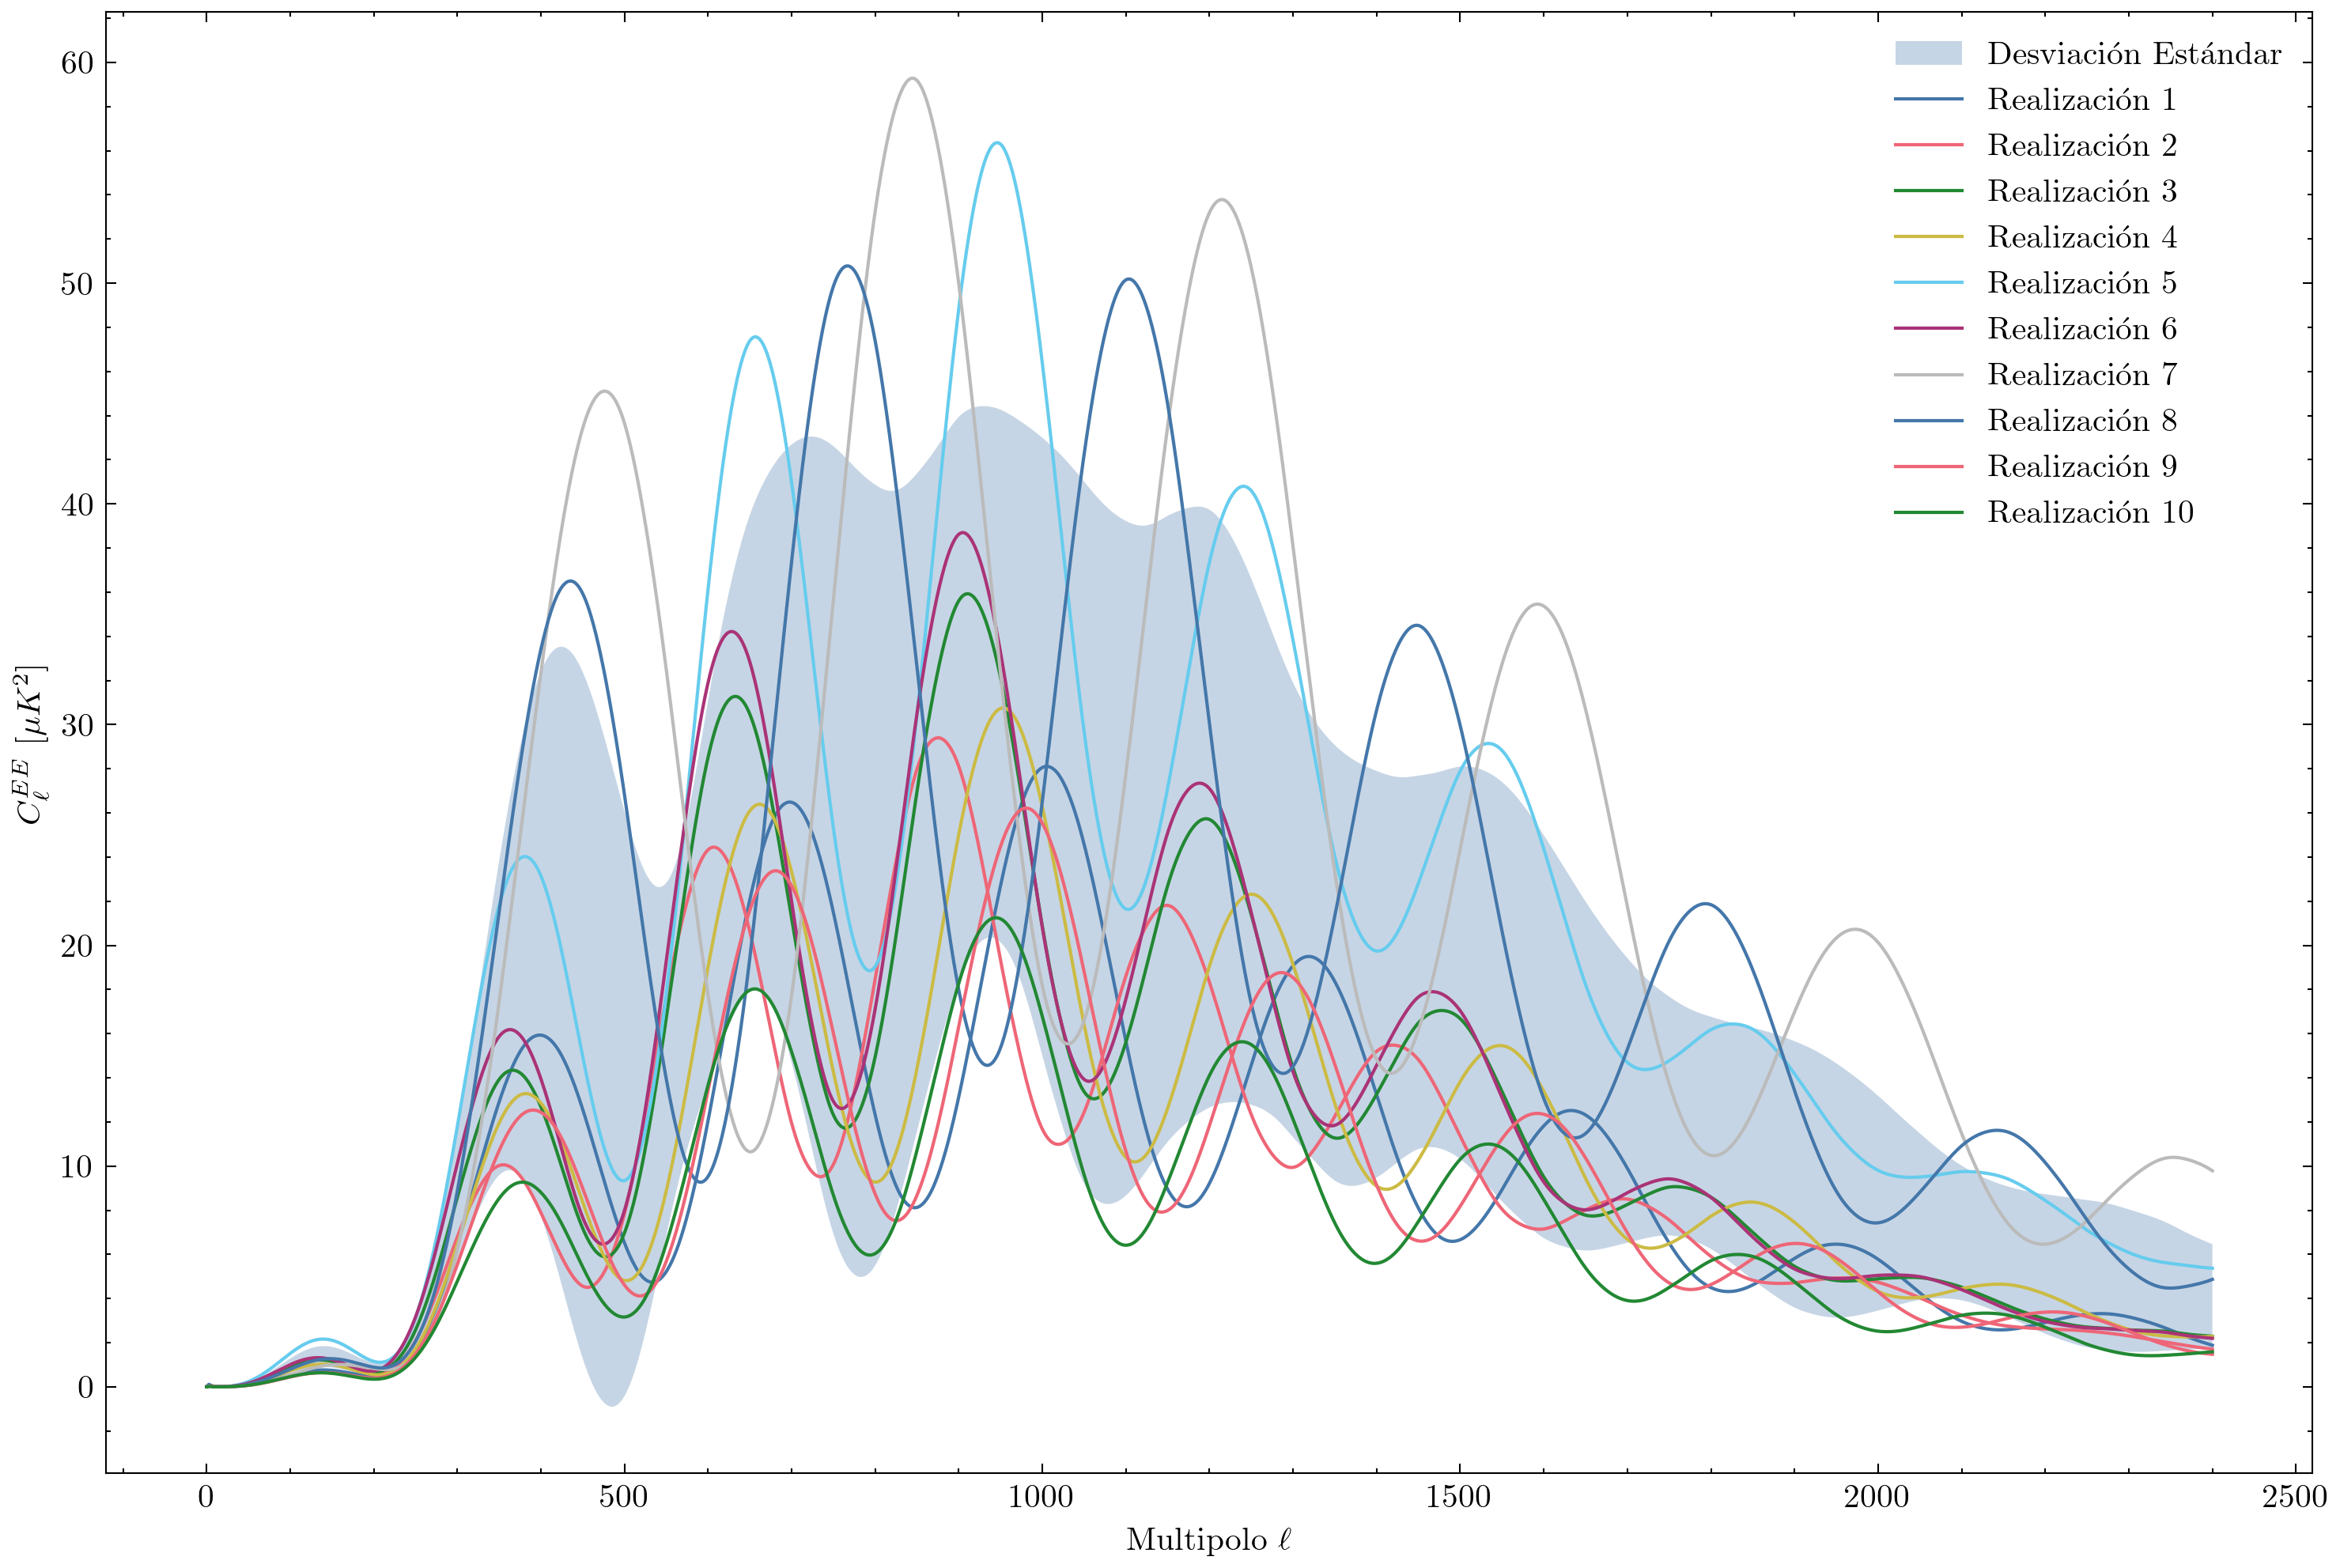

In [37]:
plt.figure(figsize=(12, 8))
plt.fill_between(range(len(mean_Cl)), mean_Cl[:, 1] - std_Cl[:, 1], mean_Cl[:, 1] + std_Cl[:, 1], alpha=0.3, label='Desviación Estándar')
for i in range(10):  
    plt.plot(Cl_sims[i, :, 1], label=f'Realización {i+1}')
plt.xlabel('Multipolo $\ell$')
plt.ylabel('$C_\ell^{EE}$ [$\mu K^2$]')
plt.legend()
plt.show()

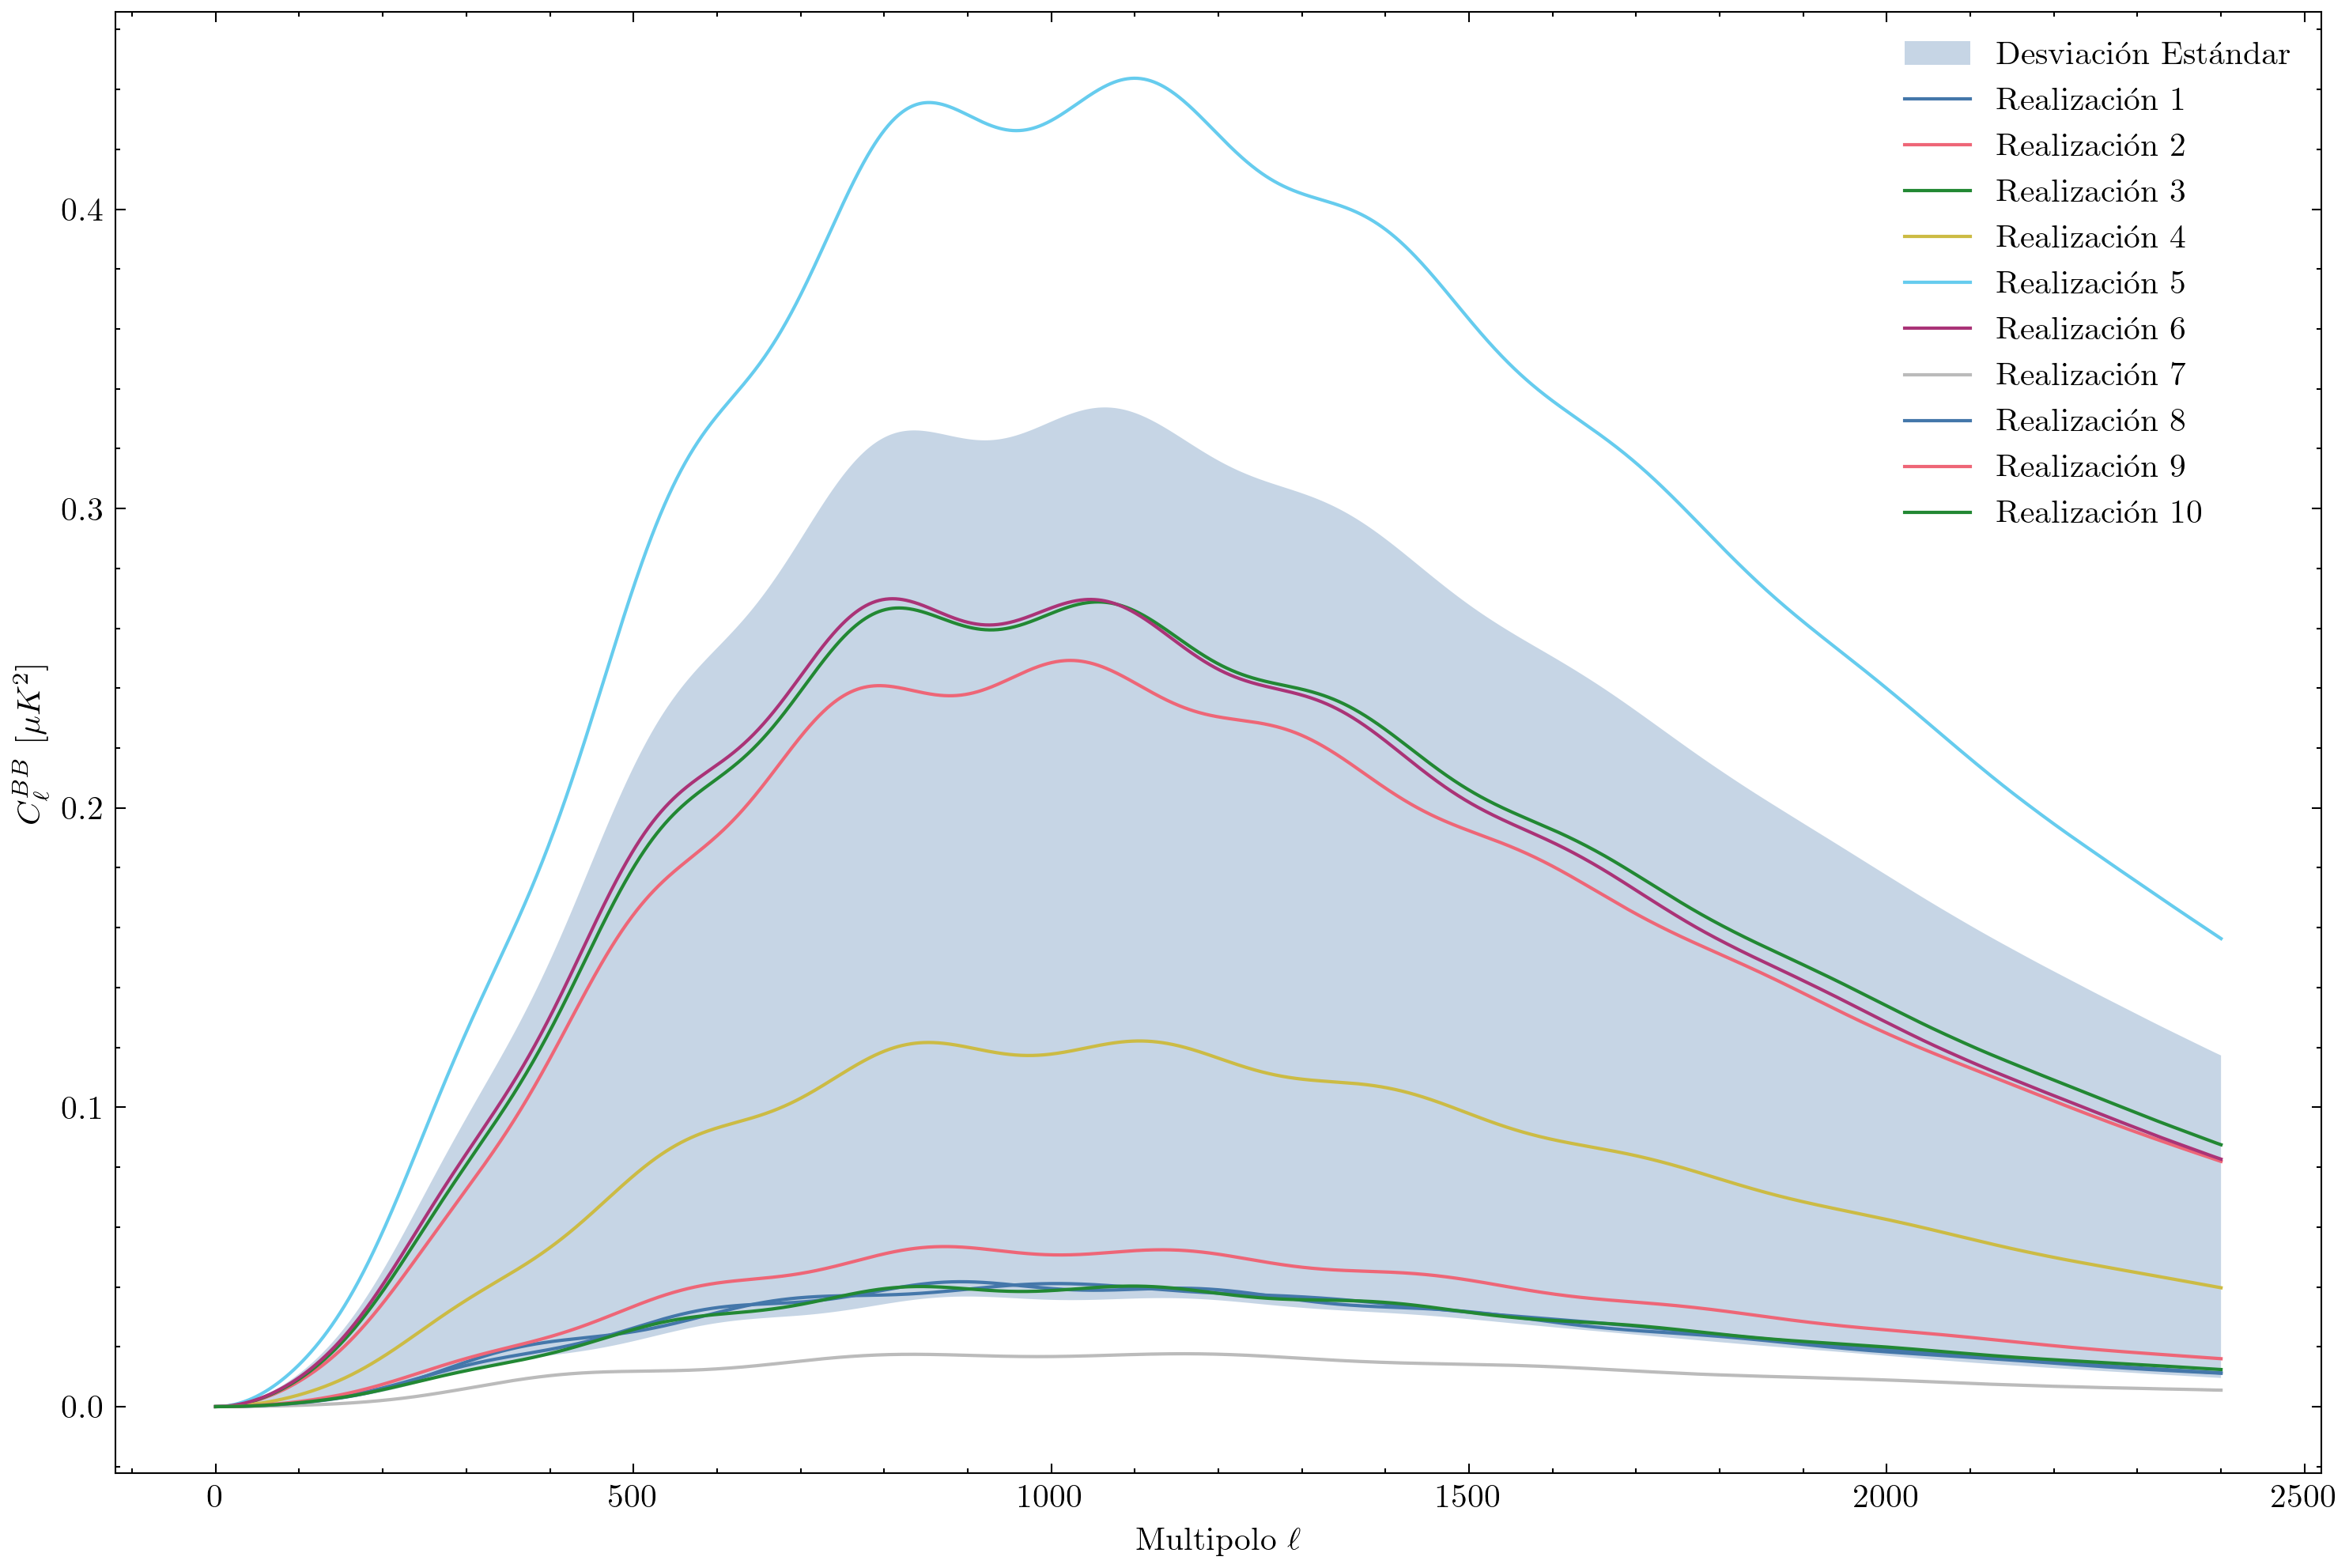

In [38]:
plt.figure(figsize=(12, 8))
plt.fill_between(range(len(mean_Cl)), mean_Cl[:, 2] - std_Cl[:, 2], mean_Cl[:, 2] + std_Cl[:, 2], alpha=0.3, label='Desviación Estándar')
for i in range(10):  
    plt.plot(Cl_sims[i, :, 2], label=f'Realización {i+1}')
plt.xlabel('Multipolo $\ell$')
plt.ylabel('$C_\ell^{BB}$ [$\mu K^2$]')
plt.legend()
plt.show()

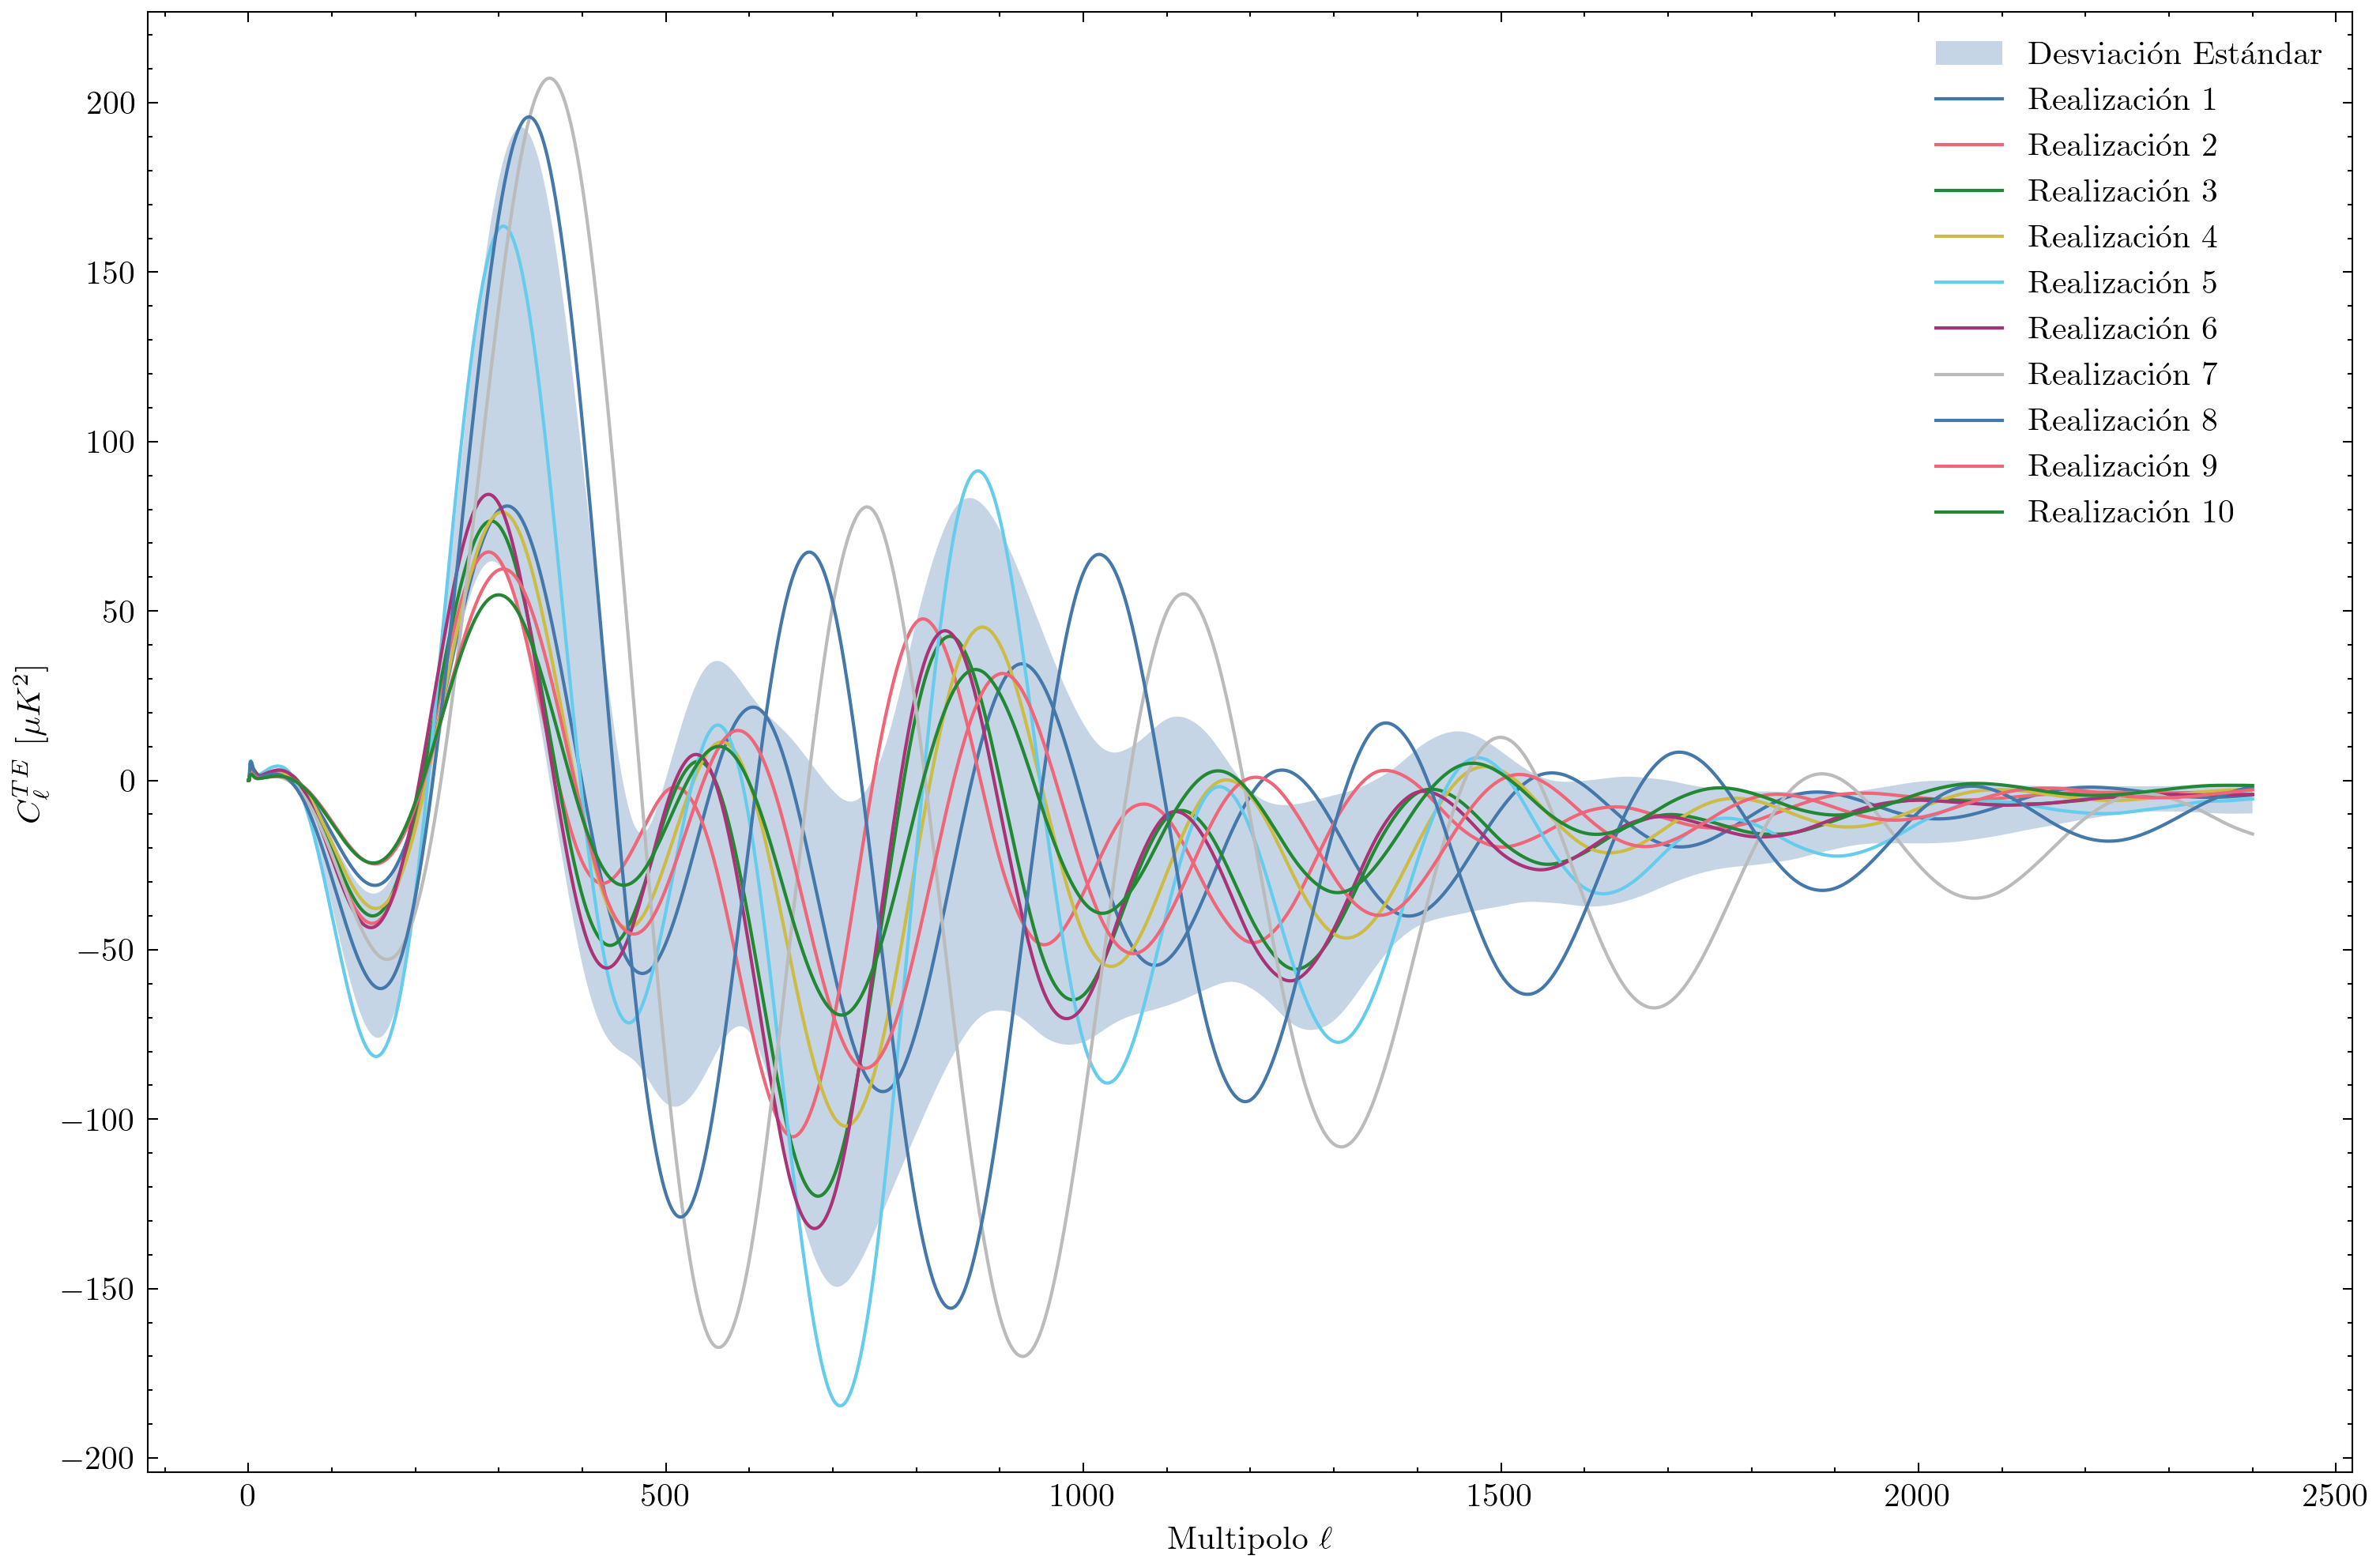

In [39]:
plt.figure(figsize=(12, 8))
plt.fill_between(range(len(mean_Cl)), mean_Cl[:, 3] - std_Cl[:, 3], mean_Cl[:, 3] + std_Cl[:, 3], alpha=0.3, label='Desviación Estándar')
for i in range(10):  
    plt.plot(Cl_sims[i, :, 3], label=f'Realización {i+1}')
plt.xlabel('Multipolo $\ell$')
plt.ylabel('$C_\ell^{TE}$ [$\mu K^2$]')
plt.legend()
plt.show()

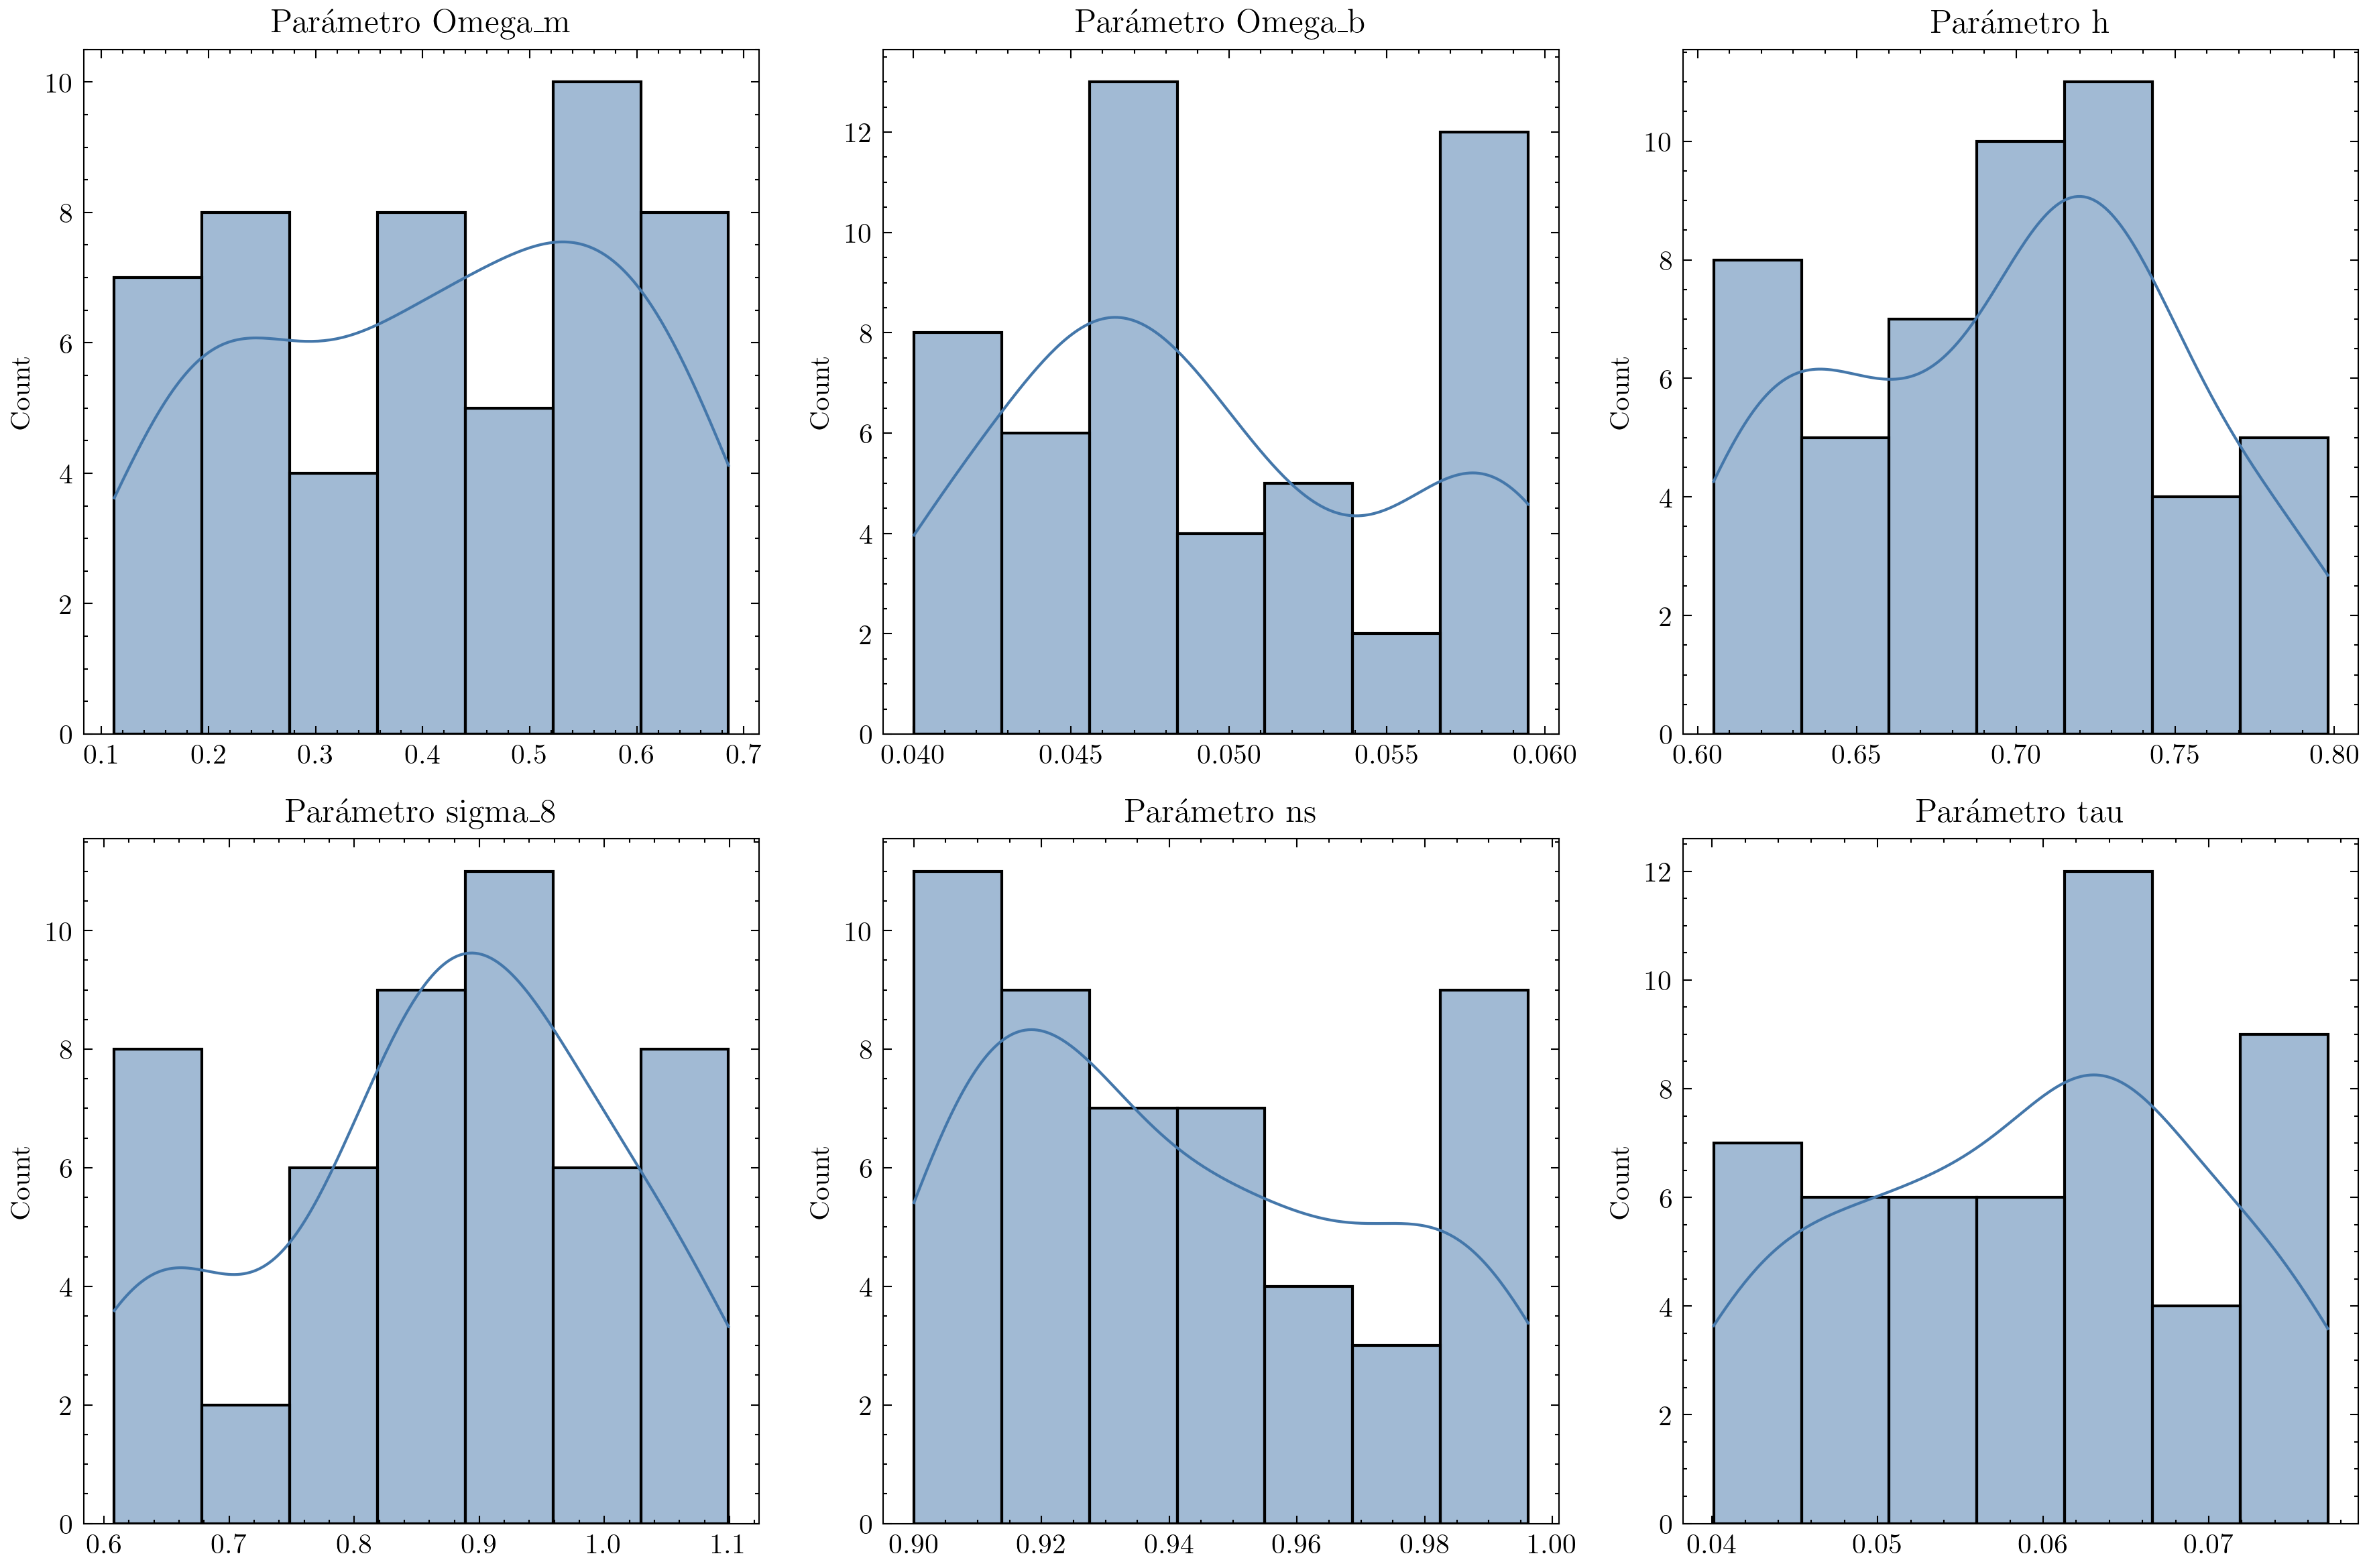

In [40]:
names = ["Omega_m", "Omega_b", "h", "sigma_8", "ns", "tau"]

# Distribuciones
plt.figure(figsize=(12, 8))
for i in range(params.shape[1]):
    plt.subplot(2, 3, i+1)
    sns.histplot(params[:, i], kde=True)
    plt.title(f"Parámetro {names[i]}")
plt.tight_layout()
plt.show()

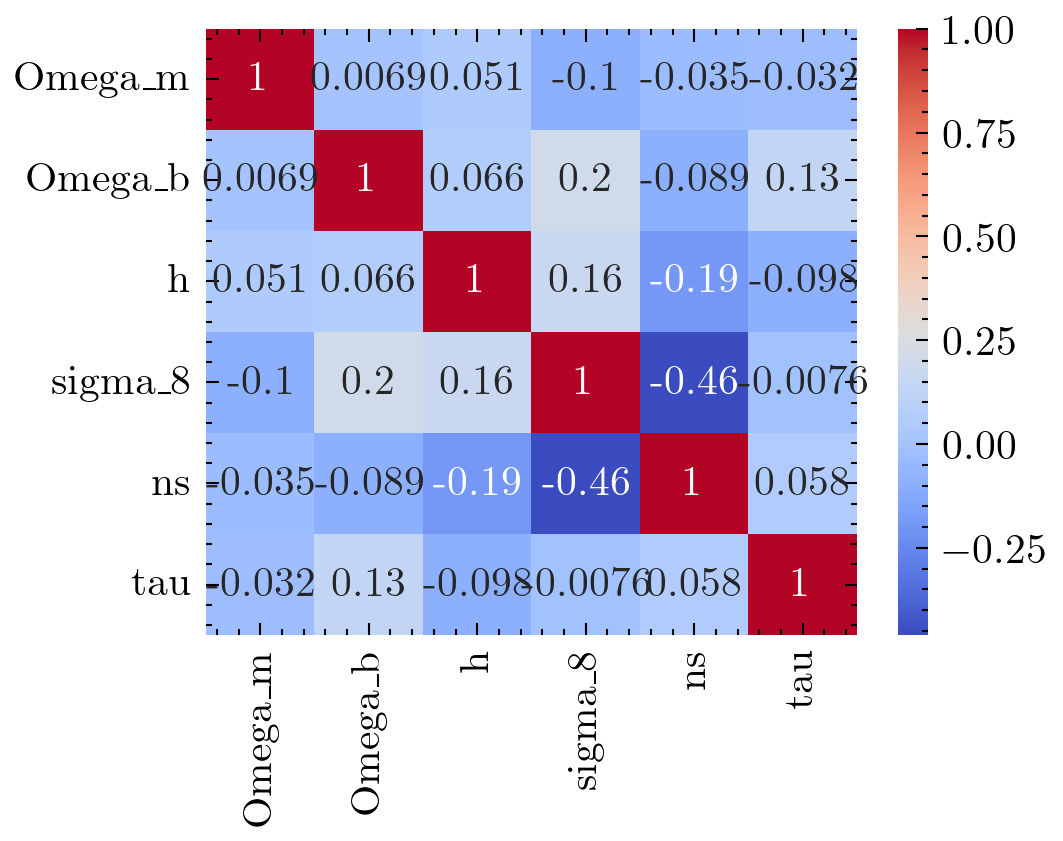

In [41]:
params_df = pd.DataFrame(params, columns=["Omega_m", "Omega_b", "h", "sigma_8", "ns", "tau"])

# Matriz de correlación
corr_matrix = params_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [42]:
# Falta analisis